# __`RNN`__

In [27]:
import os
import random

from keras.datasets import imdb
from keras.layers import Bidirectional, Dense, Embedding, GRU, LSTM, SimpleRNN
from keras.models import Sequential
from keras.utils import pad_sequences
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [28]:
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    os.environ['TF_DETERMINISTIC_OPS'] = 'true'


set_seed(1)

In [29]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [30]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

In [31]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

#### Побудова моделей RNN:

many to one:

In [32]:
model = Sequential()
# Створення порожньої моделі Sequential
model_LSTM = Sequential()
model_GRU = Sequential()
model_BRNN = Sequential()
model_DRNN = Sequential()

# Додавання Embedding шару для перетворення слів(one-hot vectors 10K) в вектори фіксованої довжини 32
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_LSTM.add(Embedding(max_features, 32))
model_GRU.add(Embedding(max_features, 32))
model_BRNN.add(Embedding(max_features, 32))
model_DRNN.add(Embedding(max_features, 32))

# Додавання SimpleRNN шару з 32 вузлами
model.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)
model_LSTM.add(LSTM(32))
model_GRU.add(GRU(32))
model_BRNN.add(Bidirectional(LSTM(32)))
model_DRNN.add(Bidirectional(LSTM(32, return_sequences=True)))
model_DRNN.add(Bidirectional(LSTM(32)))

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
model_LSTM.add(Dense(1, activation='sigmoid'))
model_GRU.add(Dense(1, activation='sigmoid'))
model_BRNN.add(Dense(1, activation='sigmoid'))
model_DRNN.add(Dense(1, activation='sigmoid'))

In [ ]:
# model = Sequential()
# model.add(Embedding(max_features, 32))
# model.add(SimpleRNN(32, return_sequences=True))
# model.add(SimpleRNN(32))
# model.add(Dense(1, activation='sigmoid'))

many to many:

In [ ]:
# model = Sequential()
# model.add(Embedding(max_features, 64))
# model.add(SimpleRNN(32, return_sequences=True))
# model.add(SimpleRNN(32, return_sequences=True))
# model.add(TimeDistributed(Dense(1, activation='sigmoid')))
# model.summary()

In [ ]:
# model = Sequential()
# model.add(Embedding(max_features, 64))
# model.add(SimpleRNN(32, return_sequences=True))
# model.add(TimeDistributed(Dense(5, activation='softmax')))  # 5 - number of clases for each word
# model.summary()

In [33]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_LSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_BRNN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_DRNN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [34]:
model.summary()  # ...

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


#### Навчання:

In [35]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 [==============================] - 24s 165ms/step - loss: 0.6699 - acc: 0.5734 - val_loss: 0.5867 - val_acc: 0.6949
Epoch 2/5
137/137 [==============================] - 25s 180ms/step - loss: 0.4782 - acc: 0.7714 - val_loss: 0.8667 - val_acc: 0.6284
Epoch 3/5
137/137 [==============================] - 24s 176ms/step - loss: 0.3468 - acc: 0.8550 - val_loss: 0.3768 - val_acc: 0.8447
Epoch 4/5
137/137 [==============================] - 24s 175ms/step - loss: 0.2603 - acc: 0.8991 - val_loss: 0.3639 - val_acc: 0.8541
Epoch 5/5
137/137 [==============================] - 24s 177ms/step - loss: 0.2068 - acc: 0.9231 - val_loss: 0.3990 - val_acc: 0.8391


In [36]:
history_LSTM = model_LSTM.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 56s 396ms/step - loss: 0.6273 - acc: 0.6341 - val_loss: 0.4865 - val_acc: 0.7813
Epoch 2/5
137/137 [==============================] - 57s 416ms/step - loss: 0.3860 - acc: 0.8395 - val_loss: 0.3227 - val_acc: 0.8700
Epoch 3/5
137/137 [==============================] - 56s 410ms/step - loss: 0.2924 - acc: 0.8858 - val_loss: 0.3101 - val_acc: 0.8705
Epoch 4/5
137/137 [==============================] - 59s 431ms/step - loss: 0.2412 - acc: 0.9097 - val_loss: 0.3567 - val_acc: 0.8439
Epoch 5/5
137/137 [==============================] - 56s 410ms/step - loss: 0.2078 - acc: 0.9243 - val_loss: 0.2940 - val_acc: 0.8856


In [37]:
history_GRU = model_GRU.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 52s 361ms/step - loss: 0.6505 - acc: 0.6015 - val_loss: 0.4749 - val_acc: 0.7704
Epoch 2/5
137/137 [==============================] - 67s 489ms/step - loss: 0.3875 - acc: 0.8312 - val_loss: 0.3948 - val_acc: 0.8305
Epoch 3/5
137/137 [==============================] - 50s 364ms/step - loss: 0.2954 - acc: 0.8814 - val_loss: 0.3244 - val_acc: 0.8623
Epoch 4/5
137/137 [==============================] - 51s 375ms/step - loss: 0.2486 - acc: 0.9035 - val_loss: 0.3501 - val_acc: 0.8515
Epoch 5/5
137/137 [==============================] - 53s 386ms/step - loss: 0.2192 - acc: 0.9189 - val_loss: 0.3298 - val_acc: 0.8651


In [38]:
history_BRNN = model_BRNN.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 108s 761ms/step - loss: 0.6395 - acc: 0.6157 - val_loss: 0.5150 - val_acc: 0.7893
Epoch 2/5
137/137 [==============================] - 96s 704ms/step - loss: 0.4026 - acc: 0.8287 - val_loss: 0.3347 - val_acc: 0.8600
Epoch 3/5
137/137 [==============================] - 108s 786ms/step - loss: 0.3025 - acc: 0.8829 - val_loss: 0.3681 - val_acc: 0.8417
Epoch 4/5
137/137 [==============================] - 93s 676ms/step - loss: 0.2425 - acc: 0.9087 - val_loss: 0.3355 - val_acc: 0.8585
Epoch 5/5
137/137 [==============================] - 111s 813ms/step - loss: 0.2095 - acc: 0.9218 - val_loss: 0.2983 - val_acc: 0.8760


In [39]:
history_DRNN = model_DRNN.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 236s 2s/step - loss: 0.6539 - acc: 0.5826 - val_loss: 0.4751 - val_acc: 0.7881
Epoch 2/5
137/137 [==============================] - 227s 2s/step - loss: 0.4060 - acc: 0.8286 - val_loss: 0.3680 - val_acc: 0.8436
Epoch 3/5
137/137 [==============================] - 240s 2s/step - loss: 0.2867 - acc: 0.8879 - val_loss: 0.3256 - val_acc: 0.8665
Epoch 4/5
137/137 [==============================] - 227s 2s/step - loss: 0.2270 - acc: 0.9159 - val_loss: 0.3385 - val_acc: 0.8545
Epoch 5/5
137/137 [==============================] - 207s 2s/step - loss: 0.1867 - acc: 0.9326 - val_loss: 0.3038 - val_acc: 0.8775


#### Відображення результатів:

In [40]:
def draw_results(history) -> None:
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
  plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
  plt.title('Точність тренування і валідації')  # Заголовок графіку
  plt.legend()  # Показати легенду

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
  plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
  plt.title('Втрати тренування і валідації')  # Заголовок графіку
  plt.legend()  # Показати легенду

  plt.show()  # Відобразити графіки


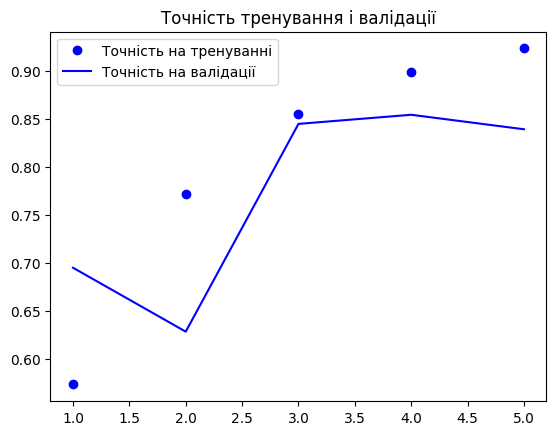

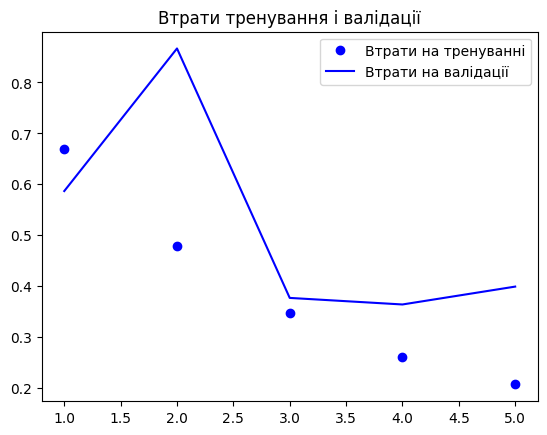

In [41]:
draw_results(history)

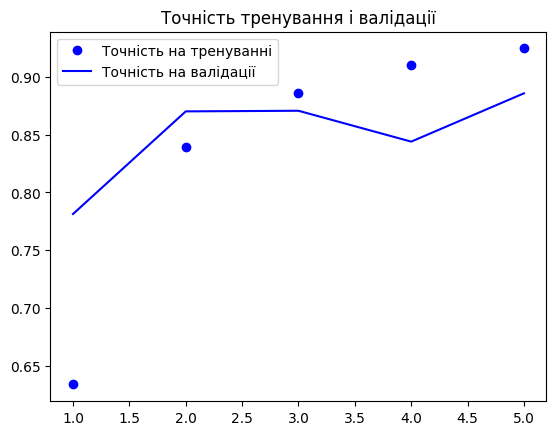

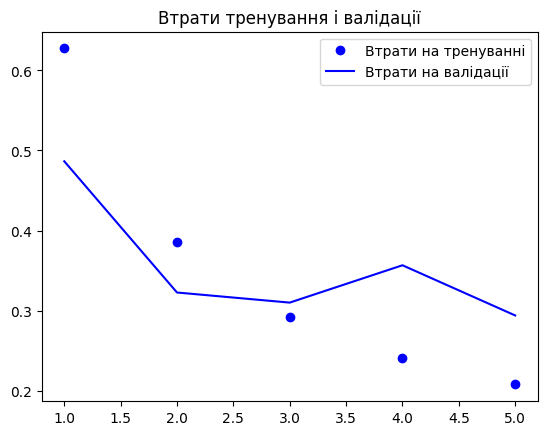

In [42]:
draw_results(history_LSTM)

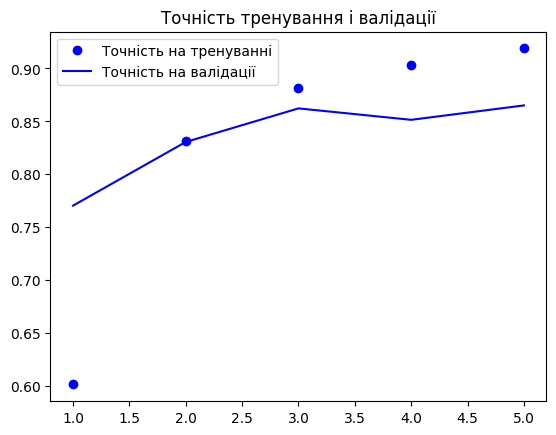

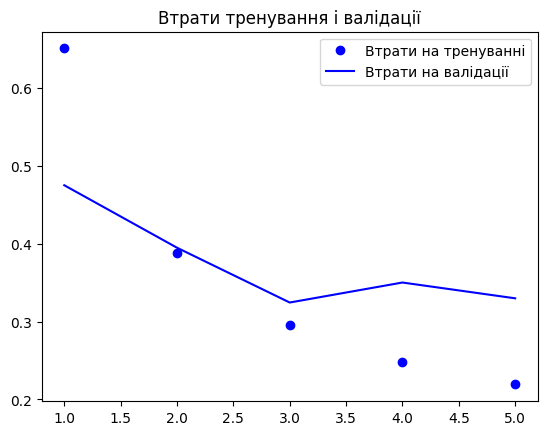

In [43]:
draw_results(history_GRU)

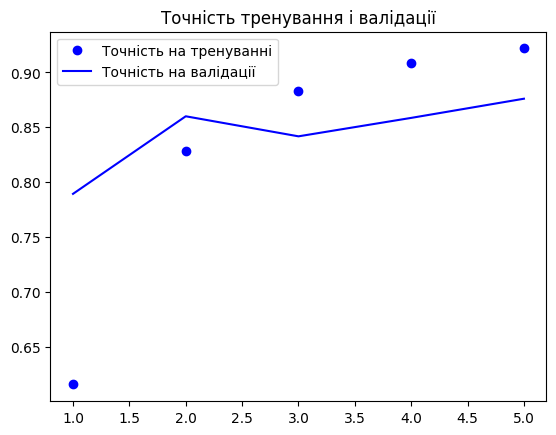

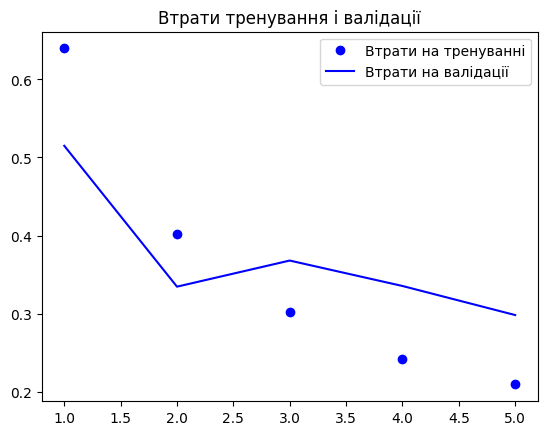

In [44]:
draw_results(history_BRNN)

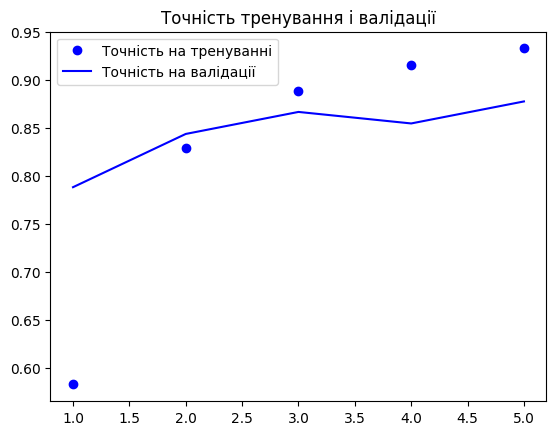

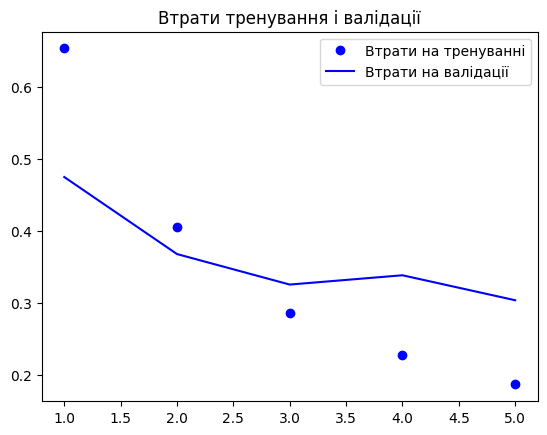

In [45]:
draw_results(history_DRNN)

Прогнозування з використанням навченої моделі:

In [46]:
def predict_by_model(model):
  predictions = model.predict(input_test)

  # Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
  binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

  # Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
  for i in range(10):
      print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

  # Додатковий крок: Оцінка моделі
  # Це дасть загальну точність моделі на тестових даних
  test_loss, test_acc = model.evaluate(input_test, y_test)
  print('Test Loss: {}'.format(test_loss))
  print('Test Accuracy: {}'.format(test_acc))

In [47]:
predict_by_model(model)

782/782 [==============================] - 22s 28ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 23s 29ms/step - loss: 0.4057 - acc: 0.8380
Test Loss: 0.4056764841079712
Test Accuracy: 0.8379999995231628


In [48]:
predict_by_model(model_LSTM)

782/782 [==============================] - 37s 46ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 39s 50ms/step - loss: 0.3080 - acc: 0.8768
Test Loss: 0.30801695585250854
Test Accuracy: 0.8767600059509277


In [49]:
predict_by_model(model_GRU)

782/782 [==============================] - 32s 40ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 36s 46ms/step - loss: 0.3446 - acc: 0.8570
Test Loss: 0.34461119771003723
Test Accuracy: 0.8570399880409241


In [50]:
predict_by_model(model_BRNN)

782/782 [==============================] - 62s 78ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 63s 80ms/step - loss: 0.3082 - acc: 0.8706
Test Loss: 0.30816006660461426
Test Accuracy: 0.8705599904060364


In [51]:
predict_by_model(model_DRNN)

782/782 [==============================] - 123s 154ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 127s 162ms/step - loss: 0.3123 - acc: 0.8757
Test Loss: 0.3122849762439728
Test Accuracy: 0.8757200241088867
